In [1]:
# Question 1  (a)

In [2]:
import numpy as np
csv = "https://www.dropbox.com/s/oqoyy9p849ewzt2/linear.csv?dl=1" 
data = np.genfromtxt(csv,delimiter=',')
X = data[:,1:]
Y = data[:,0]
tX = X[10:,:]
tY=Y[10:]
vX=X[0:10,:]
vY=Y[0:10]
print("tX: ", tX.shape[0],tX.shape[1])
print("tY: ", tY.shape[0])
print("vX: ", vX.shape[0],vX.shape[1])
print("vY: ", vY.shape[0])

tX:  40 4
tY:  40
vX:  10 4
vY:  10


In [3]:
# Question 1  (b)

In [4]:
import theano
import theano.tensor as T
d = X.shape[1]     # dimension of feature vectors
n = X.shape[0]     # number of training samples
learn_rate = 0.5     # learning rate for gradient descent
lamda = 0.15

In [5]:
x = T.matrix(name='x')     # feature matrix
y = T.vector(name='y')     # responese vector
w = theano.shared(np.zeros((d,1)),name='w')     # model parameteres

In [6]:
risk = T.sum((T.dot(x,w).T - y)**2)/2/n + T.sum(T.dot(w[:-1].T,w[:-1])) * lamda / 2     # empirical risk
grad_risk = T.grad(risk, wrt=w)     # gradient of the risk

# print(grad_risk)

In [7]:
train_model = theano.function(inputs=[],
                             outputs=risk,
                             updates=[(w, w-learn_rate*grad_risk)],
                             givens={x:tX, y:tY})

In [8]:
n_steps = 50
lost_list = []
w_dict = {}
for i in range(n_steps):
#     print(train_model())
#     print(w.get_value())
    train_model()
    
print(w.get_value())
# print(lost_list)

[[-0.52706566]
 [ 1.16683314]
 [ 0.04560471]
 [-1.84895354]]


In [9]:
# The third coefficient is not necessary.

In [10]:
# Question 1  (c)

In [11]:
from scipy.optimize import fmin_l_bfgs_b as minimize
def costgrad(w,x,y):
    cost = np.sum((np.matmul(x,w) -y)**2)/2/n + np.sum(w[:-1]**2) *lamda / 2
    grad = lamda *w + np.matmul(np.matmul(x.transpose(), x), w) / n - np.matmul(x.transpose(), y) / n
    return cost, grad

ww = np.random.randn(d)
optx, cost, messages = minimize(costgrad, ww, args=[tX, tY])
print(optx, cost, messages)

[-0.5795898   1.10869139  0.05205841 -1.54176655] 0.18176300911174764 {'warnflag': 0, 'funcalls': 21, 'grad': array([-2.90677132e-03,  2.95530465e-03,  6.31016868e-05, -5.43680878e-04]), 'task': b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH', 'nit': 4}


In [12]:
# Question 1  (d)

In [13]:
def ridge_regression(tX, tY, l):
    features = tX.shape[1]
    idmatrix = np.identity(features)
    idmatrix[-1][-1] = 0
    identical = features * l * idmatrix
    befinv = identical + np.matmul(tX.transpose(), tX)
    aftinv = np.linalg.inv(befinv)
    fst = np.matmul(aftinv, tX.transpose())
    return np.matmul(fst, tY)
ridge_regression(tX, tY, 0.15)

array([-0.56686946,  1.35570117,  0.03038393, -1.88108993])

In [14]:
# Question 1  (e)

<IPython.core.display.Javascript object>


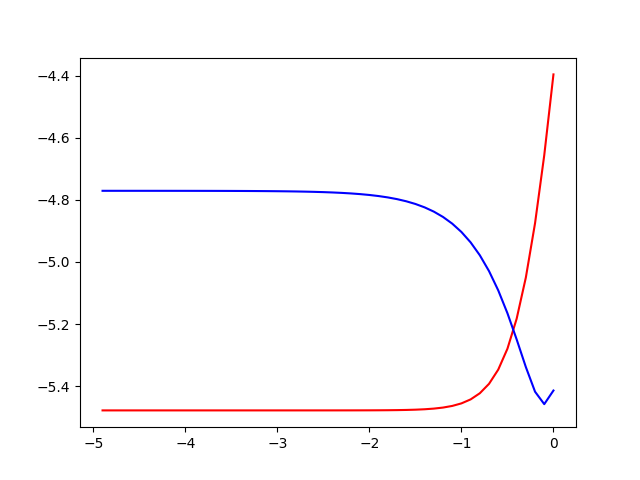

0.7943282347242815


In [15]:
%matplotlib notebook
tn = tX.shape[0]
vn = vX.shape[0]
tloss = []
vloss = []
vdic = {}
index = -np.arange(0,5,0.1)
for i in index:
    w = ridge_regression(tX, tY, 10**i)
    tloss = tloss+[np.sum((np.dot(tX,w)-tY)**2)/tn/2]
    vsingle = np.sum((np.dot(vX,w)-vY)**2)/vn/2
    vloss = vloss+[vsingle]
    vdic[vsingle] = i
import matplotlib.pyplot as plt
plt.plot(index, np.log(tloss), 'r')
plt.plot(index, np.log(vloss), 'b')
vloss.sort()
llan = vdic[vloss[0]]
print(10**llan)